In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('student_admission_record_dirty.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [4]:
df.isnull().sum()

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
student_name_null_count = df['Name'].isnull().sum() # 10 missing names
df[df['Name'].isna()]
# keeping data as it contains other important information needed for analysis
df['Name'] = df['Name'].fillna('Unknown') # fill in empty names with Unknown

In [7]:
student_age_null_count = df['Age'].isnull().sum() # 10 missing 'Age' values
age_mean = round(df['Age'].mean())

# Fill missing values in 'Age' with the mean value
df['Age'] = df['Age'].fillna(age_mean)

In [8]:
#Remove entries with null values for Admission Test Scores, High School Percentage, or Admissions Status
score_nulls = df[(df['Admission Test Score'].isna()) | (df['High School Percentage'].isna()) | (df['Admission Status'].isna())].index
df = df.drop(score_nulls)

In [9]:
#Remove entries with null 'City' values
city_nulls = df[df['City'].isna()].index
df = df.drop(city_nulls)

In [10]:
#Fill entries with null 'Gender' values with 'Unknown'
df['Gender'] = df['Gender'].fillna('Unknown')

In [11]:
df.isnull().sum() #0 nulls for every column

Name                      0
Age                       0
Gender                    0
Admission Test Score      0
High School Percentage    0
City                      0
Admission Status          0
dtype: int64

In [12]:
#Seemingly odd values for 'Age' and 'Admission Test Score' and 'High School Percentage' mins and maxes
df.describe()

,Age,Admission Test Score,High School Percentage
count,117.000000,117.000000,117.000000
mean,19.675214,77.478632,76.245299
std,4.514019,15.631312,16.764851
min,-1.000000,-5.000000,-10.000000
25%,18.000000,71.000000,66.510000
50%,20.000000,79.000000,78.300000
75%,22.000000,89.000000,90.050000
max,24.000000,99.000000,110.500000


<Axes: >

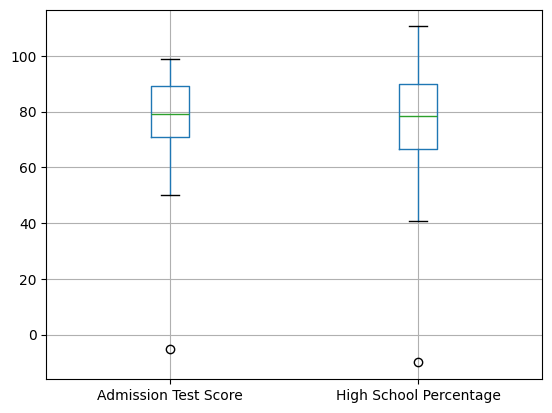

In [13]:
#A couple entries have scores below a 0%
df.boxplot(column=['Admission Test Score', 'High School Percentage'])

In [14]:
score_outliers = df[(df['Admission Test Score'] < 0) | (df['High School Percentage'] < 0)].index
df = df.drop(score_outliers)

In [15]:
#Convert 'Age' entries that are less than 0 to the mean age
df.loc[df['Age'] < 0, 'Age'] = age_mean

In [32]:
df.corr(numeric_only=True)

,Age,Admission Test Score,High School Percentage
Age,1.000000,-0.031316,0.126111
Admission Test Score,-0.031316,1.000000,-0.215795
High School Percentage,0.126111,-0.215795,1.000000
